In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
num_cols=data.select_dtypes(include='number').columns.tolist()
cat_cols=data.select_dtypes(include='object').columns.tolist()

In [27]:
print(num_cols)

['age', 'bmi', 'children', 'charges']


In [28]:
print(cat_cols)

['sex', 'smoker', 'region']


In [29]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [30]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le=LabelEncoder()
    le.fit(data[col].drop_duplicates())
    data[col]=le.transform(data[col])


<Axes: >

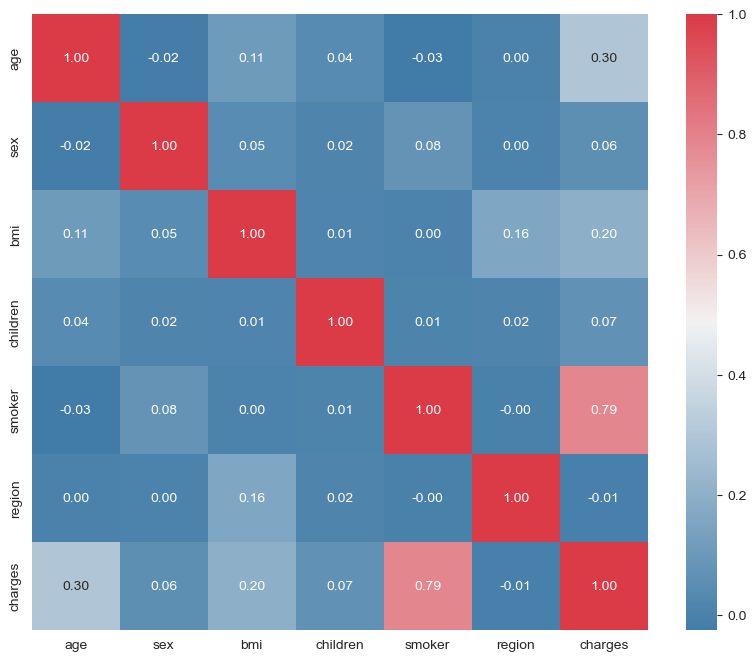

In [32]:
f,ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(240,10,as_cmap=True),mask=np.zeros_like(corr,dtype=np.bool_),square=True,ax=ax)


<Axes: >

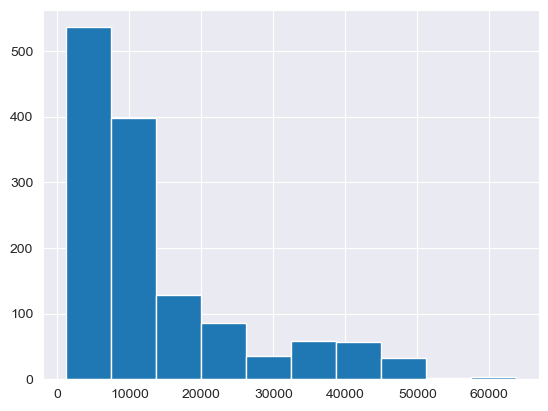

In [33]:
data['charges'].hist()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

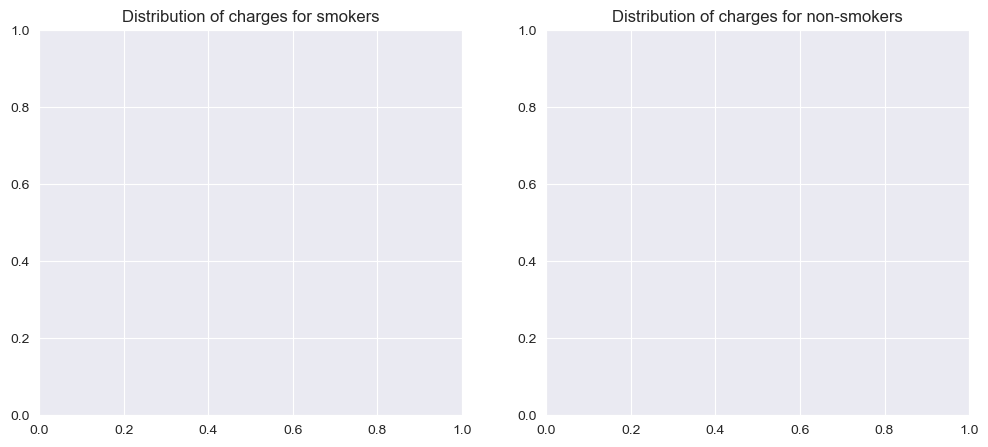

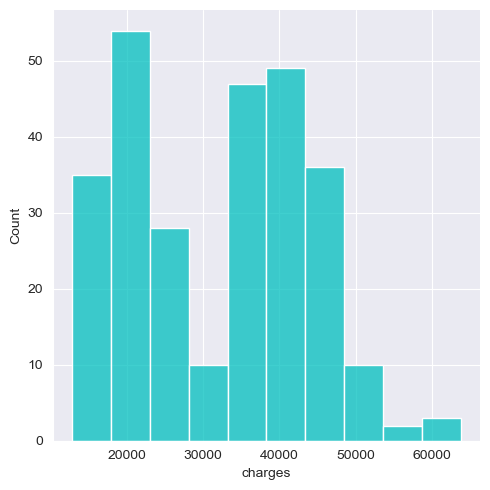

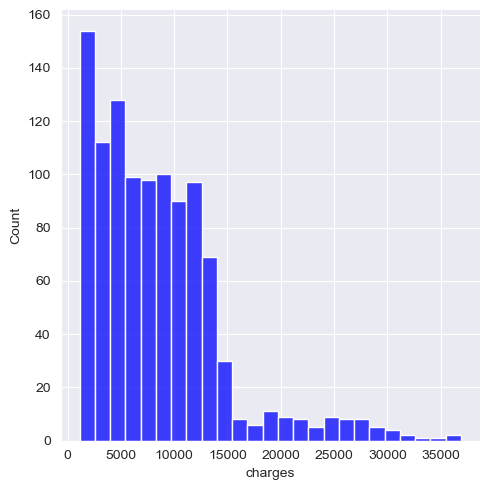

In [34]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.displot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.displot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

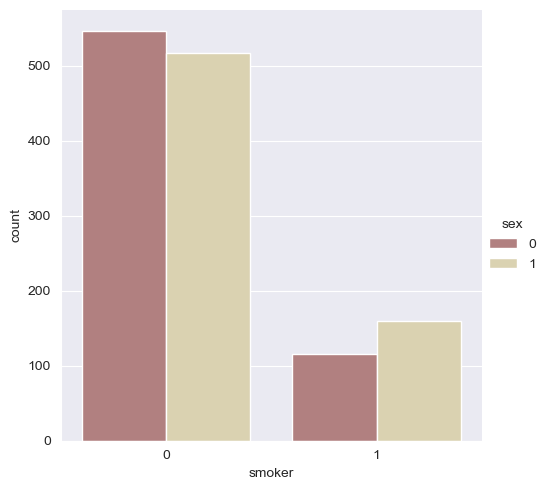

In [35]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

<Axes: >

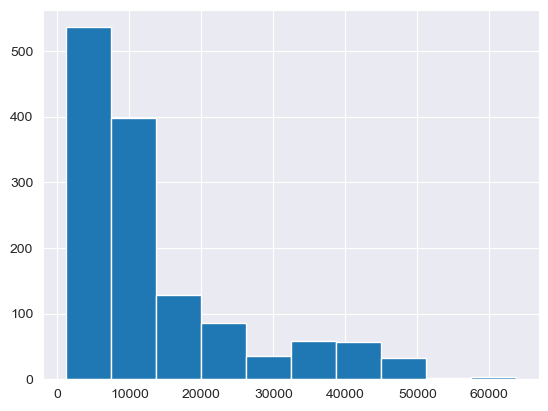

In [36]:
data['charges'].hist()

<Axes: title={'center': 'Boxplot of Charges'}, xlabel='charges', ylabel='smoker'>

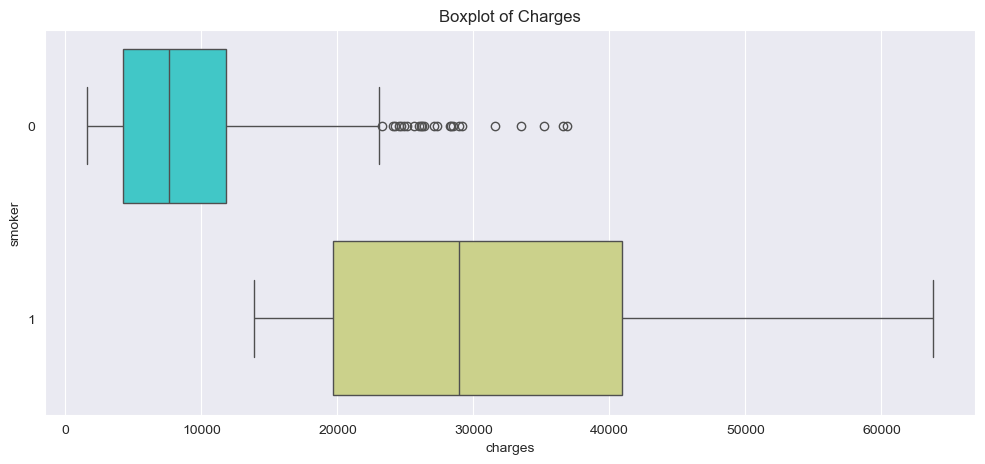

In [37]:
plt.figure(figsize=(12,5))
plt.title('Boxplot of Charges')
sns.boxplot(x='charges',y='smoker',data=data[(data.sex==0)],orient='h',palette='rainbow')

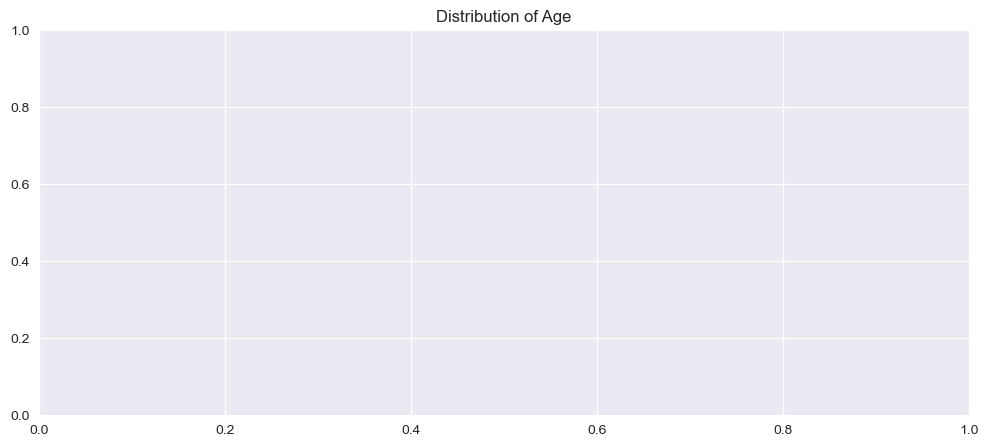

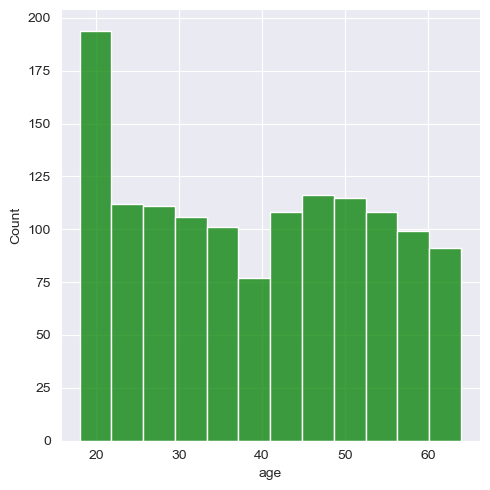

In [38]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Age')
ax=sns.displot(data['age'],color='g')

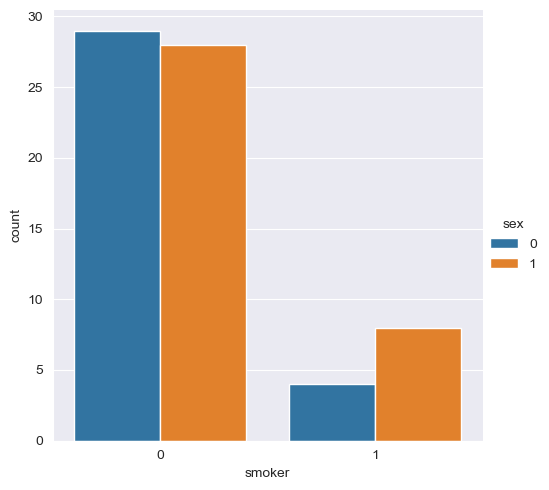

In [39]:
sns.catplot(x='smoker',kind='count',hue='sex',data=data[(data.age==18)])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [41]:
X=data.drop(['charges'],axis=1)
y=data['charges']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [44]:
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
y_train_pred=lr_clf.predict(X_train)
y_test_pred=lr_clf.predict(X_test)
print(lr_clf.score(X_test,y_test))

0.7833463107364538


In [45]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges
quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_quad,y,test_size=0.2,random_state=42)

In [46]:
plr=LinearRegression()
plr.fit(X_train,y_train)
y_train_pred=plr.predict(X_train)
y_test_pred=plr.predict(X_test)
print(plr.score(X_test,y_test))

0.8669441556658777
